In [ ]:
%pip install scikit-learn==1.2.0

Note: you may need to restart the kernel to use updated packages.


# Exercício de Classificação - Predição na qualidade do leite

Feature:
- pH
- Temprature
- Taste
- Odor
- Fat
- Turbidity
- Colour

Target:
- Grade


To-Dos do exercício:

- Transformar a variável target (Grade) de string para numérica (0,1,2). Lembrando que é um problema multiclasse (Uma única coluna de target) e não multi-label (Múltiplas colunas de target).
- Separação de Treino X Teste:
> Separa o conjunto de treino e teste com os dados resultante em 50% para cada.
- Normalização dos dados:
> Utilizando a função StandardScaler já fornecida, normaliza os dados de treino (Somente é usado o fit em cima dos dados de treino) e teste das colunas pH, Temperature e Colour.
- Treinar o modelo:
> Se quiserem, podem brincar com os parâmetros do modelo
- Validação do modelo:
> Analisar a acurácia do modelo com dados de teste
> Criar matriz de confusão para avaliar o modelo
> Verificar outras métricas de performance do modelo (Se quiser)



Dataset: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

# Importação das bibliotecas que irá utilizar

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Análise primária (Estatística/ Valores nulos/ Dados coerentes) e EDA

In [ ]:
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df.columns = ['ph', 'temp', 'taste', 'odor', 'fat', 'turb', 'colour', 'target']

In [ ]:
df.describe(percentiles=[0.1,0.8,0.9,0.95,0.99])

,ph,temp,taste,odor,fat,turb,colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
10%,4.500000,36.000000,0.000000,0.000000,0.000000,0.000000,245.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
80%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
90%,8.600000,55.000000,1.000000,1.000000,1.000000,1.000000,255.000000
95%,9.000000,66.000000,1.000000,1.000000,1.000000,1.000000,255.000000
99%,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


<AxesSubplot:>

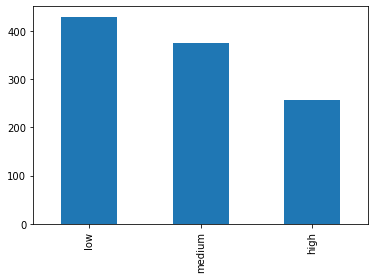

In [ ]:
df.target.value_counts().plot.bar()

<AxesSubplot:xlabel='taste', ylabel='count'>

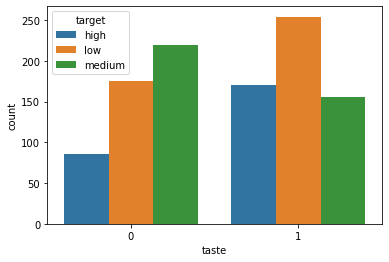

In [ ]:
sns.countplot(data=df,x='taste',hue='target')

<AxesSubplot:xlabel='fat', ylabel='count'>

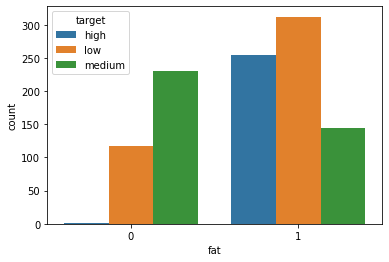

In [ ]:
sns.countplot(data=df,x='fat',hue='target')

<AxesSubplot:xlabel='turb', ylabel='count'>

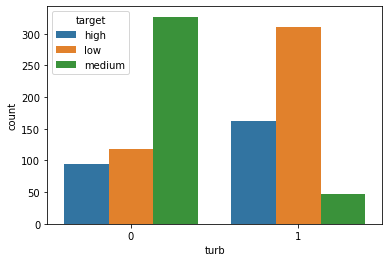

In [ ]:
sns.countplot(data=df,x='turb',hue='target')

<AxesSubplot:xlabel='ph', ylabel='Count'>

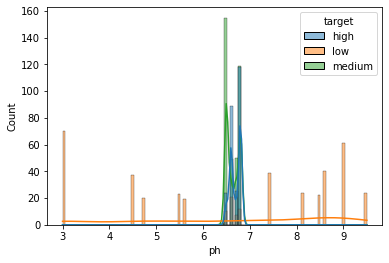

In [ ]:
sns.histplot(data=df,kde=True,x='ph',hue='target')

<AxesSubplot:xlabel='temp', ylabel='Count'>

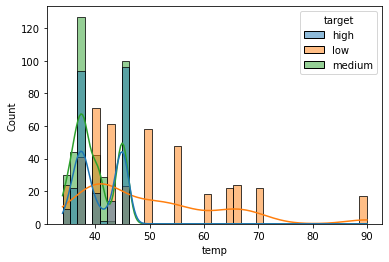

In [ ]:
sns.histplot(data=df,kde=True,x='temp',hue='target')

<AxesSubplot:xlabel='colour', ylabel='Count'>

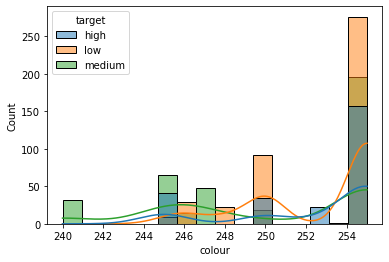

In [ ]:
sns.histplot(data=df,kde=True,x='colour',hue='target')

<AxesSubplot:>

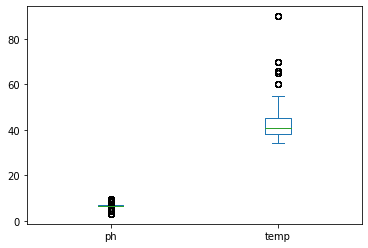

In [ ]:
df[['ph','temp']].plot.box()

# Separação Treino X Teste

In [ ]:
X = df[df.columns[df.columns != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

# Pré-processamento dos dados

In [ ]:
scaler_columns = ['ph', 'temp','colour']

scaler = StandardScaler()
scaler.fit(X_train[scaler_columns])

X_train[scaler_columns] = scaler.transform(X_train[scaler_columns])
X_test[scaler_columns] = scaler.transform(X_test[scaler_columns])

X_train

,ph,temp,taste,odor,fat,turb,colour
965,-0.024223,-0.127437,1,0,1,1,-0.427669
461,-0.024223,-0.690784,1,1,1,1,0.731331
652,0.127421,-0.315219,0,0,1,0,0.731331
397,0.127421,-0.784675,0,1,1,0,0.267731
61,0.051599,-0.596893,1,0,1,0,0.731331
...,...,...,...,...,...,...,...
68,-1.464836,-0.596893,1,0,1,0,0.731331
702,-0.100045,-0.596893,1,1,1,1,0.731331
472,0.051599,-0.596893,1,0,1,0,0.731331
147,-0.100045,-0.784675,0,0,0,0,-1.123069


# Treinamento do modelo

In [ ]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)

KNeighborsClassifier()

# Validação do modelo

In [ ]:
y_pred = KNC.predict(X_test)
y_true = y_test

In [ ]:
# Acuracy
metrics.accuracy_score(y_true,y_pred)

0.9962264150943396

In [ ]:
# Full report
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       123
         low       1.00      0.99      1.00       218
      medium       0.99      1.00      0.99       189

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



# Plus: Usando Pipelines

In [ ]:
# Train-test split
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [ ]:
# Pipeline de pré-processamento
preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), ['ph','temp']),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False), ['colour']), #OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
], remainder='passthrough')

# Mostrando resultado do pré-processamento
preprocessor.set_output(transform='pandas').fit_transform(X_train)

,scaler__ph,scaler__temp,onehot__colour_240,onehot__colour_245,onehot__colour_246,onehot__colour_247,onehot__colour_248,onehot__colour_250,onehot__colour_253,onehot__colour_254,onehot__colour_255,remainder__taste,remainder__odor,remainder__fat,remainder__turb
783,1.008808,2.139754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1
755,1.984673,-0.978778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1
122,-0.036763,-0.588962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
621,0.102646,0.093217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
198,0.102646,0.093217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-1.500562,1.555029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,1
663,-2.546132,-0.394054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
938,0.032942,0.093217,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
378,0.102646,0.093217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1


In [ ]:
# Pipeline de pré-processamento + modelagem
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Mostrando pipeline completo
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['ph', 'temp']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['colour'])])),
                ('model', RandomForestClassifier())])

In [ ]:
# Aplicando pré-processamento + treino
pipeline.fit(X_train, y_train)

# Adquirindo predições
y_pred = pipeline.predict(X_test)

# Avaliando métricas do modelo
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.99      1.00      1.00       130
         low       1.00      1.00      1.00       212
      medium       1.00      1.00      1.00       188

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



In [ ]:
model = pipeline.named_steps['model']
pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False).to_frame('importance')

,importance
scaler__ph,0.376994
scaler__temp,0.212271
remainder__turb,0.118130
remainder__fat,0.072060
remainder__odor,0.068982
remainder__taste,0.042998
onehot__colour_245,0.024216
onehot__colour_255,0.019691
onehot__colour_253,0.014421
onehot__colour_247,0.013094
